# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [6]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin,square
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


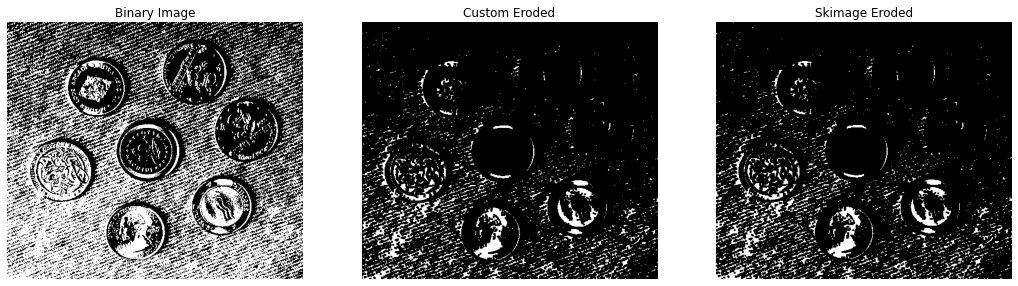

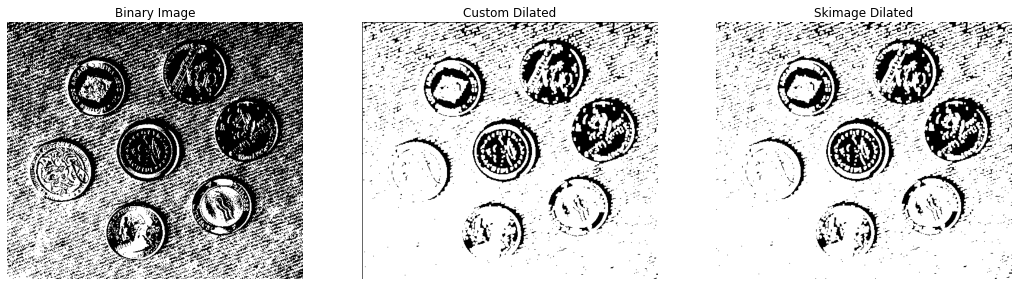

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]])

In [4]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''
thres=150
coinImg=rgb2gray(io.imread("img/coins.jpg"))
coinImg[coinImg<thres/255]=0
coinImg[coinImg>=thres/255]=1

def erode(img,windowSize):
    erodedImg=np.zeros((img.shape[0]-2,img.shape[1]-2))
    boxCenterToBoundary=windowSize//2
    se=np.full((windowSize,windowSize),1)
    for i in range(boxCenterToBoundary,img.shape[0]-boxCenterToBoundary-1):
        for j in range(boxCenterToBoundary,img.shape[1]-boxCenterToBoundary-1):
            window= img[i-boxCenterToBoundary:i+boxCenterToBoundary+1, j-boxCenterToBoundary:j+boxCenterToBoundary+1]
            product= window*se
            erodedImg[i,j]= np.min(product)
    show_images([img,erodedImg,binary_erosion(img,se)],["Binary Image","Custom Eroded","Skimage Eroded"])
    return erodedImg

def dilate(img,windowSize):
    dilatedImg=np.zeros((img.shape[0]-2,img.shape[1]-2))
    boxCenterToBoundary=windowSize//2
    se=np.full((windowSize,windowSize),1)
    for i in range(boxCenterToBoundary,img.shape[0]-boxCenterToBoundary-1):
        for j in range(boxCenterToBoundary,img.shape[1]-boxCenterToBoundary-1):
            window= img[i-boxCenterToBoundary:i+boxCenterToBoundary+1, j-boxCenterToBoundary:j+boxCenterToBoundary+1]
            product= window*se
            dilatedImg[i,j]= np.max(product)
    show_images([img,dilatedImg,binary_dilation(img,se)],["Binary Image","Custom Dilated","Skimage Dilated"])
    return dilatedImg



erode(coinImg,3)
dilate(coinImg,3)



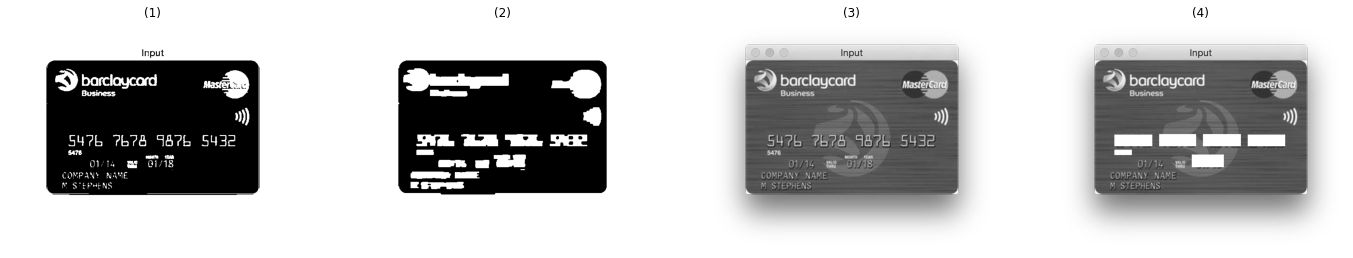

In [19]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''
thres=140
cardImg=rgb2gray(io.imread("img/card.jpg"))
grayImg=cardImg.copy()
cardImg[cardImg<thres/255]=0
cardImg[cardImg>=thres/255]=1
# img2=cardImg.copy()
# cardImg=dilate(cardImg,windowSize=5)
# cardImg=erode(cardImg,windowSize=5)
se=np.full((10,10),1)
# # show_images([cardImg,binary_closing(img2)])
# show_images([cardImg])
# closedImg=binary_closing(cardImg,se)

#closedImg = erode(dilate(cardImg,windowSize=7),windowSize=7)
dia_SE = np.ones((4,11))
closedImg = binary_erosion(binary_dilation(cardImg , dia_SE))

bounding_boxes=[]
contours=find_contours(closedImg, 0.8)
for contour in contours:
    yValues = contour[:,0]
    xValues = contour[:,1]
    Ymin=yValues.min()
    Ymax=yValues.max()
    
    Xmin=xValues.min()
    Xmax=xValues.max()
    
    x_difference = Xmax - Xmin
    y_difference = Ymax - Ymin
    
    ratio = x_difference / y_difference
    if ratio > 2.5 and ratio < 3.5:
        box = [int(np.round(Xmin))  , int(np.round(Xmax)) , int(np.round(Ymin)) , int(np.round(Ymax))]
        bounding_boxes.append(box)

img_with_boxes=grayImg.copy()
# When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=grayImg.shape)
    img_with_boxes[rr, cc] = 1 #set color white

show_images([cardImg,closedImg,grayImg,img_with_boxes])


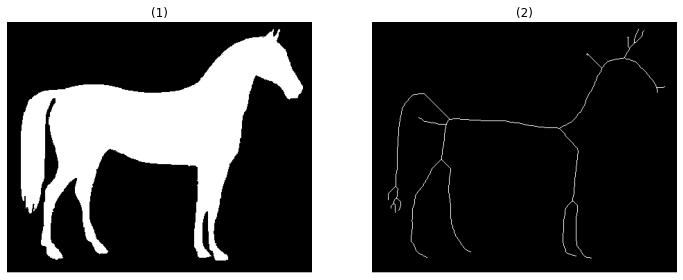

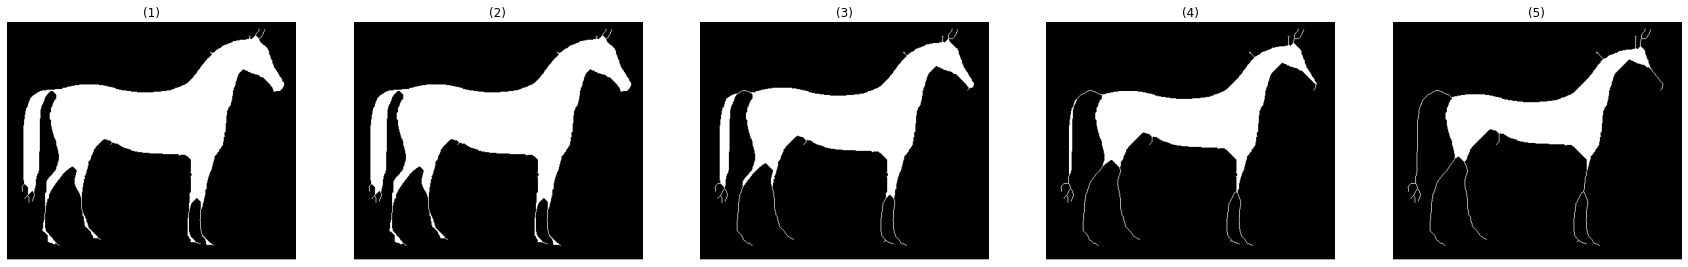

In [4]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
horseImg=rgb2gray(io.imread("img/horse.jpg"))
horseImg[horseImg<0.9]=0
horseImg[horseImg>=0.9]=1
horseSkeleton=skeletonize(horseImg)
show_images([horseImg,horseSkeleton])
show_images([thin(horseImg,5),thin(horseImg,5),thin(horseImg,10),thin(horseImg,15),thin(horseImg,20)])
